# Data Processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,10]

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.columns=['Area Type','Availability','Location','Size','Society','Total SQFT','Bath','Balcony','Price']

In [5]:
df.shape

(13320, 9)

In [6]:
df['Area Type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: Area Type, dtype: int64

In [7]:
#df['Society'].fillna("Not Mentioned",inplace=True)
#df['Location'].fillna("Not Mentioned",inplace=True)
#df['Size'].fillna("Not Mentioned",inplace=True)
#df['Bath'].fillna(0,inplace=True)
#df['Balcony'].fillna(0,inplace=True)

In [8]:
df2=df.drop(['Area Type','Society','Balcony','Availability'],axis=1)
df2.head()

,Location,Size,Total SQFT,Bath,Price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning

In [9]:
df2.isnull().sum()

Location       1
Size          16
Total SQFT     0
Bath          73
Price          0
dtype: int64

In [10]:
df2.dropna(inplace=True)

In [11]:
df2['Size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df2['BHK'] = df2['Size'].apply(lambda x:int(x.split(" ")[0]))

In [13]:
df2.head()

,Location,Size,Total SQFT,Bath,Price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df2.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df2[df2.BHK>20]

,Location,Size,Total SQFT,Bath,Price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
df2['Total SQFT'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df2[~df2['Total SQFT'].apply(is_float)].head(10)

,Location,Size,Total SQFT,Bath,Price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [19]:
def sqft_to_num(x):
    tokens = x.split("-")
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
df2['Total SQFT']=df2['Total SQFT'].apply(sqft_to_num)
df2.head()

,Location,Size,Total SQFT,Bath,Price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
df2['Price Per SQFT']=(df2['Price']*100000)/df2['Total SQFT']
df2.head()

,Location,Size,Total SQFT,Bath,Price,BHK,Price Per SQFT
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
df2.Location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [23]:
len(df2.Location.unique())

1304

In [24]:
df2.Location=df2.Location.apply(lambda x:x.strip())
locations = df2.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
locations

Location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: Location, Length: 1293, dtype: int64

In [25]:
len(locations[locations<=10])

1052

In [26]:
locations_less_than_10 = locations[locations<=10]
locations_less_than_10                                   

Location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: Location, Length: 1052, dtype: int64

In [27]:
df2.Location=df2.Location.apply(lambda x:'other'if x in locations_less_than_10 else x)
len(df2.Location.unique())

242

In [28]:
df2.describe()

,Total SQFT,Bath,Price,BHK,Price Per SQFT
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1555.302783,2.692586,112.389392,2.801902,7.920759e+03
std,1237.323445,1.341506,149.076587,1.295758,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [29]:
df2[df2['Total SQFT']/df2['BHK']<300]

,Location,Size,Total SQFT,Bath,Price,BHK,Price Per SQFT
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [30]:
df2=df2[~(df2['Total SQFT']/df2['BHK']<300)]

Rejection: 72 points
z_score of 5 corresponds to prob of 0.00%


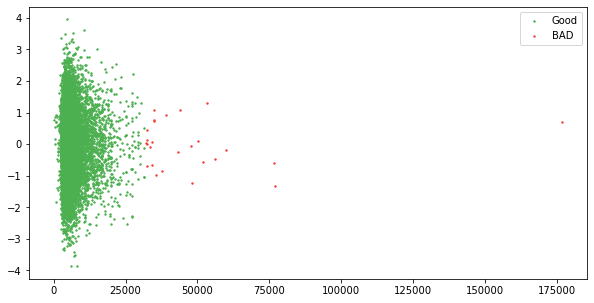

In [31]:
data=df2
#Outliers Detection
mean,std=np.mean(data['Price Per SQFT']),np.std(data['Price Per SQFT'])
z_score=np.abs((data['Price Per SQFT']-mean)/std)
threshold=6
good=z_score<threshold
print(f'Rejection: {(~good).sum()} points')

from scipy.stats import norm
print(f"z_score of 5 corresponds to prob of {100*2*norm.sf(threshold):0.2f}%")
visual_scatter=np.random.normal(size=data['Price Per SQFT'].size)

plt.figure(figsize=(10,5))
plt.scatter(data['Price Per SQFT'][good],visual_scatter[good],s=2,label='Good',color='#4CAF50')
plt.scatter(data['Price Per SQFT'][~good],visual_scatter[~good],s=2,label='BAD',color='#F44336')
plt.legend()

Rejection: 27 points
z_score of 5 corresponds to prob of 0.00%


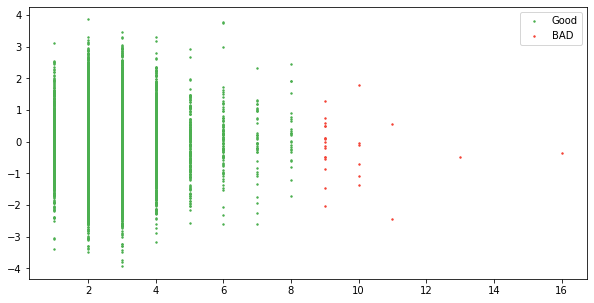

In [32]:
data=df2
#Outliers Detection
mean,std=np.mean(data['BHK']),np.std(data['BHK'])
z_score=np.abs((data['BHK']-mean)/std)
threshold=6
good=z_score<threshold
print(f'Rejection: {(~good).sum()} points')

from scipy.stats import norm
print(f"z_score of 5 corresponds to prob of {100*2*norm.sf(threshold):0.2f}%")
visual_scatter=np.random.normal(size=data['BHK'].size)

plt.figure(figsize=(10,5))
plt.scatter(data['BHK'][good],visual_scatter[good],s=2,label='Good',color='#4CAF50')
plt.scatter(data['BHK'][~good],visual_scatter[~good],s=2,label='BAD',color='#F44336')
plt.legend()

In [33]:
df2=df2[~(df2['Price Per SQFT']>30000)]

In [34]:
df2=df2[~(df2['BHK']>10)]

In [35]:
df2.Location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', '7th Phase JP Nagar', 'Gottigere',
       'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'other', 'Kengeri', 'Binny Pete',
       'Thanisandra', 'Bellandur', 'Electronic City', 'Ramagondanahalli',
       'Yelahanka', 'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'Doddathoguru', 'KR Puram',
       'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road', 'Varthur',
       'Bommanahalli', 'Gunjur', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Kothannur', 'Kalena Agrahara', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - Attibele Road',
       'Yeshwanthpur', 'Chandapura', 'Nagarbhavi',

In [36]:
df2.head()

,Location,Size,Total SQFT,Bath,Price,BHK,Price Per SQFT
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [46]:
df2.drop("Location",axis=1,inplace=True)

In [38]:
from sklearn.preprocessing import LabelEncoder

sc=LabelEncoder()
#df2['Location']=sc.fit_transform(df2['Location'])
df2['Size']=sc.fit_transform(df2['Size'])

In [39]:
le_name_mapping = dict(zip(sc.classes_, sc.transform(sc.classes_)))
print(le_name_mapping)

{'1 BHK': 0, '1 Bedroom': 1, '1 RK': 2, '10 BHK': 3, '10 Bedroom': 4, '2 BHK': 5, '2 Bedroom': 6, '3 BHK': 7, '3 Bedroom': 8, '4 BHK': 9, '4 Bedroom': 10, '5 BHK': 11, '5 Bedroom': 12, '6 BHK': 13, '6 Bedroom': 14, '7 BHK': 15, '7 Bedroom': 16, '8 BHK': 17, '8 Bedroom': 18, '9 BHK': 19, '9 Bedroom': 20}


In [40]:
df2.shape

(12467, 7)

# Data Modelling 

In [41]:
df2.dropna(inplace=True)

In [47]:
X = df2.drop('Price',axis=1)
Y = df2.Price

In [48]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV,  cross_val_score
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [50]:
alg1=RandomForestRegressor()
alg1.fit(x_train,y_train)

RandomForestRegressor()

In [51]:
def sc(y_truth,y_pred1):
    u=((y_truth-y_pred1)**2).sum()
    v=((y_truth-y_truth.mean())**2).sum()
    return 1-(u/v)

In [52]:
y_pred_1=alg1.predict(x_test)

In [53]:
print("Random Forest accuracy:",sc(y_test,y_pred_1))

Random Forest accuracy: 0.9573733083565097


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
param_grid = { 
        "n_estimators"      : [10,20,30],
        "max_features"      : ["auto", "sqrt", "log2"],
        "min_samples_split" : [2,4,8],
        "bootstrap": [True, False],
        }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [55]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 30}

In [56]:
alg=RandomForestRegressor(bootstrap= True,
                          max_features='sqrt',
                          min_samples_split=8,
                          n_estimators=30)
alg.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=8, n_estimators=30)

In [57]:
y_pred=alg.predict(x_test)
sc(y_test,y_pred)

0.941728539408968

In [58]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(alg,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))